# Домашняя работа №1

In [1]:
import numpy as np
import pylab as pl
import pandas as pd
import warnings
import math

from matplotlib import pyplot as plt
from scipy import linalg

from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl

warnings.filterwarnings("ignore")

## Задание 1

Изобразите с помощью matplotlib. Изобразите точку x + 2y + 3z. Найдите угол между векторами x, y и x, z. 

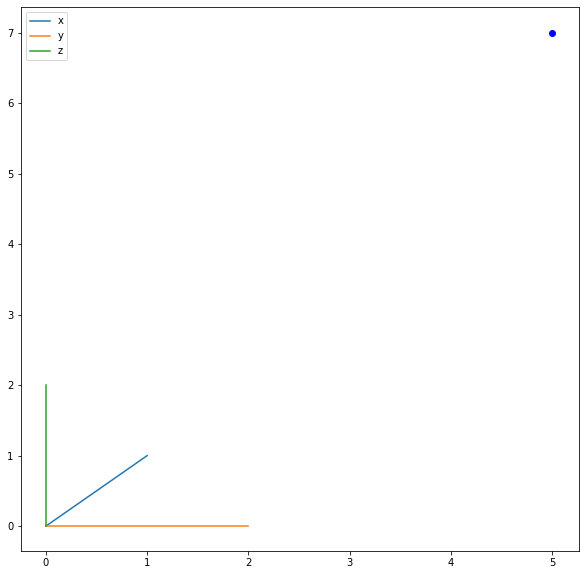

In [14]:
fig = plt.figure(figsize=(10, 10))

x = np.array([1,1])
y = np.array([2,0])
z = np.array([0,2])

plt.plot([0,x[0]], [0,x[1]])
plt.plot([0,y[0]], [0,y[1]])
plt.plot([0,z[0]], [0,z[1]])

# Изобразите точку x + 2y + 3z. 
new_point = x + y * 2 + z * 3
plt.scatter(new_point[0], new_point[1], c='b', marker='o')

plt.legend(['x', 'y', 'z'])

plt.show()

In [25]:
#  Найдите угол между векторами x, y и x, z

def cosine( a, b ):
    """
    Подсчет косинуса угла между векторами a, b по их координатам
    """
    
    # длины векторов
    aLength = np.linalg.norm( a )
    bLength = np.linalg.norm( b )
    
    return np.dot( x, y ) / ( aLength * bLength )

print("Угол между векторами x и y: ",np.arccos( cosine( x, y ) ) * 360 / 2 / np.pi)
print("Угол между векторами x и z: ",np.arccos( cosine( x, z ) ) * 360 / 2 / np.pi)

Угол между векторами x и y:  45.00000000000001
Угол между векторами x и z:  45.00000000000001


## Задание 2

Загрузите модель человека. Найдите расстояние от правой кисти до позвоночника

In [27]:
ns = ['type', 'x', 'y', 'z']
# read points for joints
dfJointsVertexes = pd.read_csv('joints.txt', sep=' ', names = ns)
axis_sort = 'x' 
df = dfJointsVertexes.sort_values(by=[axis_sort])

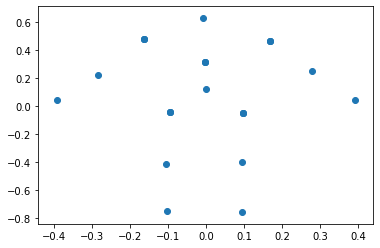

In [28]:
plt.scatter(df.x, df.y)

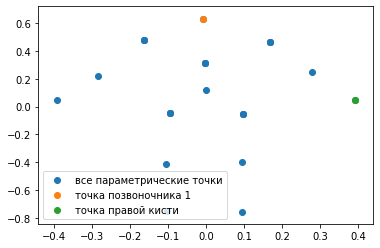

In [43]:
plt.scatter(df.x, df.y)

plt.scatter(df.x[11], df.y[11])
plt.scatter(df.x[16], df.y[16])
plt.legend(['все параметрические точки', 'точка позвоночника 1', 'точка правой кисти'])

In [44]:
# Спроецируем точку локтя на вектор позвоночника

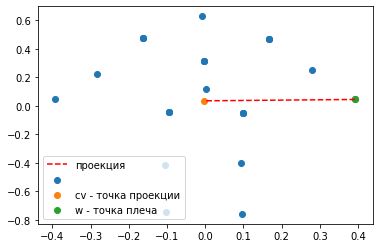

In [49]:
# вектор v - вектор позвоночника (составлен как разность одного вектора из другого)
v = np.array([df.x[9] - df.x[11], df.y[9] - df.y[11]])
# вектор w - вектор правой кисти
w = np.array([df.x[16],df.y[16]])

# строим проекцию данной точки w на вектор v: cv
cv = np.array(df.x[9], df.y[9]) + (np.dot(w,v))/np.dot(v,np.transpose(v))*v

# линия между v и cv
plt.plot([w[0],cv[0]],[w[1],cv[1]],'r--',linewidth=1.5)
plt.scatter(df.x, df.y)
plt.scatter(cv[0], cv[1])
plt.scatter(w[0], w[1])
plt.legend(['проекция', '', 'cv - точка проекции', 'w - точка плеча'])

In [50]:
# Расстояние от точки локтя до позвоночника - модуль вектора, образованного разностью двух точек: cv и w.
linalg.norm(cv - w)

0.3945363610739645

# Задание 3

Найдите собственные значения и собственные вектора матриц (необходимо решение на numpy). Для матрицы 3x3 можно посмотреть на корни характеристического многочлена, посчитанные в numpy.

In [46]:
m1 = np.array([[2, 2],
               [1, 3]])

m2 = np.array([[4, 1, -1],
               [1, 4, -1],
               [-1, -1, 4]])

In [47]:
np.linalg.eig(m1)

(array([1., 4.]),
 array([[-0.89442719, -0.70710678],
        [ 0.4472136 , -0.70710678]]))

In [53]:
from numpy import linalg as LA
e_vals, e_vecs = LA.eig(m1)
print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

# Значения собственных векторов берем из столбцов

Собственные вектора: 
 [[-0.89442719 -0.70710678]
 [ 0.4472136  -0.70710678]]
Собственные значения:  [1. 4.]


In [54]:
e_vals, e_vecs = LA.eig(m2)
print('Собственные вектора: \n', e_vecs)
print('Собственные значения: ', e_vals)

Собственные вектора: 
 [[-0.57735027 -0.81649658  0.15430335]
 [-0.57735027  0.40824829  0.6172134 ]
 [ 0.57735027 -0.40824829  0.77151675]]
Собственные значения:  [6. 3. 3.]
